In [1]:
opt_bids = [3.8622484787564275 , 2.1216094606111944,  2.347134281066495]
opt_price = 6.321089806558111

In [3]:
import numpy as np
from tqdm import tqdm
from environment import Environment
from learners.ucb_learner import UCB1
from learners.ts_learner import TS_Learner

#Variable initialization
T = 365
regret = []
sols = []
n_bids = 10 
n_prices = 13 
n_arms = n_bids*n_prices
bids_space = np.linspace(1.0, 10.0, n_bids)
price_space = np.linspace(3.0, 15.0, n_prices)

#Object Initialization
env = Environment(noise_variance= 0.05)
ts_learner = TS_Learner(n_arms = n_arms)
ts_rewards_per_experiment = np.ndarray([])

for t in tqdm(range(T)):
    arm_indx = ts_learner.pull_arm()
    #Arm to bid, price conversion 
    bid = bids_space[arm_indx % n_bids]
    price = price_space[int(np.floor(arm_indx / n_bids))]
    #Storing Pulled arm
    bids = [bid,bid,bid]
    sols.append([bid,price])
    reward = env.round(bids,price)
    #Updating
    ts_learner.update(arm_indx, sum(reward))

    regret.append(sum(env.round(opt_bids, opt_price, noise = False)) - sum(reward))



100%|██████████| 365/365 [00:00<00:00, 912.48it/s] 


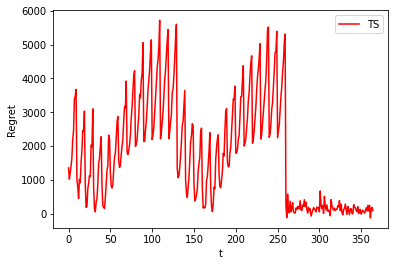

In [4]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(regret , 'r')
plt.legend(["TS" ])
plt.show()

In [5]:
regret[-10:]

[84.10427370816205,
 173.34743103420806,
 79.20946564753194,
 248.30048756338238,
 79.1017554976529,
 244.93122055010235,
 -125.88523884673396,
 142.1572772053387,
 183.0378086263886,
 90.58031288024904]

In [6]:
sols[-10:]

[[3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [3.0, 6.0],
 [4.0, 6.0],
 [3.0, 6.0]]